# Projet : Prédiction Prix Voiture

Importation des données :

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chemin_fichier = 'dataset.csv'
voiture = pd.read_csv(chemin_fichier)

In [4]:
voiture

,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,conso.batterie,couleurintérieure,puissancemoteur,primeàlaconversion,garantieconstructeur,provenance,prixinclutlabatterie,voltagebatterie,intensitébatterie,prixinclutlabatterie.1
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,11 kWh/100km,cuir noir,165 kW,,NaN,NaN,NaN,NaN,NaN,NaN
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,NaN,GRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,3 jours,\n TOYOTA YARIS 3\n,\n 17 420 €\n,2019.0,31/03/2019,non requis,29 699 Km,Hybride essence électrique,automatique,blanc,...,NaN,NaN,NaN,NaN,NaN,NaN,oui,250 V,6.5 A,NaN
2437,40 jours,\n PORSCHE 911 TYPE 992\n,\n 167 880 €\n,2020.0,30/12/2020,non requis,9 523 Km,Essence,automatique,rouge verni,...,NaN,cuir noir,331 kW,NaN,NaN,Importé,NaN,NaN,NaN,NaN
2438,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 23 350 €\n,2022.0,13/01/2023,non requis,1 Km,Essence,mécanique,Blanc,...,NaN,NaN,NaN,,en cours,NaN,NaN,NaN,NaN,NaN
2439,14 jours,\n AUDI A3 (3E GENERATION) SPORTBACK\n,\n 21 930 €\n,2017.0,02/11/2017,requis,61 363 Km,Diesel,automatique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pouvons à travers cette visualisation nous apercervoir des données à nettoyer, par exemple carmodel et price avec les \n. De plus, pour certaines colonnes il y a enormement de NaN. Vérifions maintenant le type de données et le nombre de Null que contiens chaque colonne 

In [7]:
# Vérifier les types de données et les valeurs manquantes
print(voiture.info())

# Statistiques descriptives
print(voiture.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   publishedsince            2441 non-null   object 
 1   carmodel                  2441 non-null   object 
 2   price                     2441 non-null   object 
 3   année                     2440 non-null   float64
 4   miseencirculation         2440 non-null   object 
 5   contrôletechnique         2440 non-null   object 
 6   kilométragecompteur       2440 non-null   object 
 7   énergie                   2440 non-null   object 
 8   boîtedevitesse            2440 non-null   object 
 9   couleurextérieure         2440 non-null   object 
 10  nombredeportes            2436 non-null   float64
 11  nombredeplaces            2362 non-null   float64
 12  garantie                  2062 non-null   object 
 13  premièremain(déclaratif)  2440 non-null   object 
 14  nombrede

Nous avons donc 2440 ligne de données avec 40 colonnes. On remarque que les price n'est pas un entier egalement kilométragecompteur etc. De plus, certaines colonnes on très peu de données. Commencons par supprimer les colonnes qui ont plus de 1000 valeurs manquantes. 

In [9]:
# Suppression des colonnes avec moins de 1000 valeurs non nulles
voiture_filtre = voiture.dropna(axis=1, thresh=1000)

# Affichage des informations après suppression
print(voiture_filtre.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   publishedsince            2441 non-null   object 
 1   carmodel                  2441 non-null   object 
 2   price                     2441 non-null   object 
 3   année                     2440 non-null   float64
 4   miseencirculation         2440 non-null   object 
 5   contrôletechnique         2440 non-null   object 
 6   kilométragecompteur       2440 non-null   object 
 7   énergie                   2440 non-null   object 
 8   boîtedevitesse            2440 non-null   object 
 9   couleurextérieure         2440 non-null   object 
 10  nombredeportes            2436 non-null   float64
 11  nombredeplaces            2362 non-null   float64
 12  garantie                  2062 non-null   object 
 13  premièremain(déclaratif)  2440 non-null   object 
 14  puissanc

In [11]:
voiture_filtre

,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,crit'air,émissionsdeco2,consommationmixte,normeeuro,options,departement,id,waranty,vendeur,couleurintérieure
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,1.0,111 g/kmB,4.9 l/100km,EURO6,"['airbags frontaux', 'ESP', 'AFU', 'fixations ...",35,69109812721,Garantie 12 mois,Professionnel,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,2.0,149 g/kmD,5.9 l/100km,EURO6,"['Pneus roulage à plat', 'affichage tête haute...",31,69109792781,Garantie 24 mois,Professionnel,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,1.0,49 g/kmA,2 l/100km,EURO6,"['Airbags latéraux', ""Assistance au freinage d...",94,87102223672,Garantie 6 mois,Professionnel,cuir noir
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,3.0,197 g/kmE,7.4 l/100km,EURO4,"['ABS', 'peinture métallisée', 'Système audio ...",28,69109783584,Garantie 6 mois,Professionnel,GRIS
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,1.0,104 g/kmB,4.7 l/100km,EURO6,"['Airbags rideaux', 'ESP', 'Détection panneaux...",61,69109185782,Garantie 12 mois,Professionnel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,3 jours,\n TOYOTA YARIS 3\n,\n 17 420 €\n,2019.0,31/03/2019,non requis,29 699 Km,Hybride essence électrique,automatique,blanc,...,1.0,84 g/kmA,3.7 l/100km,EURO6,"['airbags frontaux', 'ESP', 'détecteur de plui...",35,69109808415,Garantie 12 mois,Professionnel,NaN
2437,40 jours,\n PORSCHE 911 TYPE 992\n,\n 167 880 €\n,2020.0,30/12/2020,non requis,9 523 Km,Essence,automatique,rouge verni,...,1.0,205 g/kmF,9.9 l/100km,EURO6,"['Airbags latéraux', ""Assistance au freinage d...",27,87102203767,Garantie 12 mois,Professionnel,cuir noir
2438,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 23 350 €\n,2022.0,13/01/2023,non requis,1 Km,Essence,mécanique,Blanc,...,1.0,124 g/kmC,5.7 l/100km,EURO6,"['Airbags rideaux', 'kit téléphone main libre ...",13,69109443470,Garantie 12 mois,Professionnel,NaN
2439,14 jours,\n AUDI A3 (3E GENERATION) SPORTBACK\n,\n 21 930 €\n,2017.0,02/11/2017,requis,61 363 Km,Diesel,automatique,gris,...,2.0,116 g/kmB,4.4 l/100km,EURO6,"['Airbags latéraux', 'fixations ISOFIX', 'déte...",94,69109746189,Garantie 12 mois,Professionnel,NaN


Ici nous supprimons toute les lignes avec des valeurs NaN pour pouvoir convertir ces données par la suite en int. 
Exemple : \n 19 740 €\n deviens 19740. 
Nous ne perdons pas beaucoup de données car cela concerne une quantité insignificatif.

In [46]:
voiture_filtre = voiture_filtre.copy()
voiture_filtre.dropna(subset=['publishedsince', 'price', 'kilométragecompteur', 'puissancedin','puissancefiscale'], inplace=True)

Nous convertissons les colonnes ici pour avoir des entiers et non des string, sur les variables quantitatifs. 
Ici il y a une erreur parce que nous pouvons utilisé la fonction qu'une seule fois 

In [51]:
voiture_filtre['publishedsince'] = pd.to_numeric(voiture_filtre['publishedsince'], errors='coerce').astype('Int64')
voiture_filtre['price'] = pd.to_numeric(voiture_filtre['price'], errors='coerce').astype('Int64')
voiture_filtre['kilométragecompteur'] = pd.to_numeric(voiture_filtre['kilométragecompteur'], errors='coerce').astype('Int64')
voiture_filtre['émissionsdeco2'] = voiture_filtre['émissionsdeco2'].astype(str).str.extract('([A-Z])$')
voiture_filtre['puissancedin'] = voiture_filtre['puissancedin'].str.replace(' ch', '').str.replace('\s', '').astype(int)
voiture_filtre['puissancefiscale'] = voiture_filtre['puissancefiscale'].str.replace(' CV', '').str.replace('\s', '').astype(int)


AttributeError: Can only use .str accessor with string values!

Ensuite j'ai supprimé des colonnes qui étaient inutiles : 
miseencirculation,id,waranty, options, consommationmixte

In [102]:
print(voiture_filtre.dtypes)

publishedsince                Int64
carmodel                     object
price                         Int64
année                       float64
contrôletechnique            object
kilométragecompteur           Int64
énergie                      object
boîtedevitesse               object
couleurextérieure            object
nombredeportes              float64
nombredeplaces              float64
garantie                     object
premièremain(déclaratif)     object
puissancefiscale              int32
puissancedin                  int32
crit'air                    float64
émissionsdeco2               object
normeeuro                    object
departement                   int64
vendeur                      object
couleurintérieure            object
dtype: object


In [59]:
print(voiture_filtre.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 0 to 2440
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   publishedsince            1944 non-null   Int64  
 1   carmodel                  1944 non-null   object 
 2   price                     1944 non-null   Int64  
 3   année                     1944 non-null   float64
 4   contrôletechnique         1944 non-null   object 
 5   kilométragecompteur       1944 non-null   Int64  
 6   énergie                   1944 non-null   object 
 7   boîtedevitesse            1944 non-null   object 
 8   couleurextérieure         1944 non-null   object 
 9   nombredeportes            1944 non-null   float64
 10  nombredeplaces            1927 non-null   float64
 11  garantie                  1814 non-null   object 
 12  premièremain(déclaratif)  1944 non-null   object 
 13  puissancefiscale          1944 non-null   int32  
 14  puissanc

In [58]:
voiture_filtre

,publishedsince,carmodel,price,année,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,nombredeportes,...,garantie,premièremain(déclaratif),puissancefiscale,puissancedin,crit'air,émissionsdeco2,normeeuro,departement,vendeur,couleurintérieure
0,2,RENAULT TWINGO 3,11080,2020.0,non requis,27297,Essence,mécanique,gris,5.0,...,12 mois,oui,5,90,1.0,B,EURO6,35,Professionnel,NaN
1,5,BMW SERIE 4 F36 GRAN COUPE,50690,2019.0,non requis,59778,Diesel,automatique,Saphirschwarz,5.0,...,24 mois,non,15,258,2.0,D,EURO6,31,Professionnel,NaN
2,19,BMW SERIE 2 F45 ACTIVE TOURER,19740,2017.0,requis,128835,Hybride essence électrique,automatique,gris metal,5.0,...,6 mois,non,5,136,1.0,A,EURO6,94,Professionnel,cuir noir
3,8,RENAULT TRAFIC 2 MINIBUS,13890,2007.0,requis,225334,Diesel,mécanique,GRIS F,4.0,...,6 mois,non,9,135,3.0,E,EURO4,28,Professionnel,GRIS
4,60,CITROEN C3 (3E GENERATION),16780,2020.0,non requis,14218,Essence,mécanique,gris foncé,5.0,...,12 mois,non,5,110,1.0,B,EURO6,61,Professionnel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,3,TOYOTA YARIS 3,17420,2019.0,non requis,29699,Hybride essence électrique,automatique,blanc,5.0,...,12 mois,oui,3,73,1.0,A,EURO6,35,Professionnel,NaN
2437,40,PORSCHE 911 TYPE 992,167880,2020.0,non requis,9523,Essence,automatique,rouge verni,2.0,...,12 mois,oui,34,450,1.0,F,EURO6,27,Professionnel,cuir noir
2438,60,CITROEN C3 (3E GENERATION),23350,2022.0,non requis,1,Essence,mécanique,Blanc,5.0,...,12 mois,oui,6,110,1.0,C,EURO6,13,Professionnel,NaN
2439,14,AUDI A3 (3E GENERATION) SPORTBACK,21930,2017.0,requis,61363,Diesel,automatique,gris,5.0,...,12 mois,non,8,150,2.0,B,EURO6,94,Professionnel,NaN


C:\Users\2000002850\AppData\Local\Temp\ipykernel_24496\3110008690.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = voiture_filtre.corr()


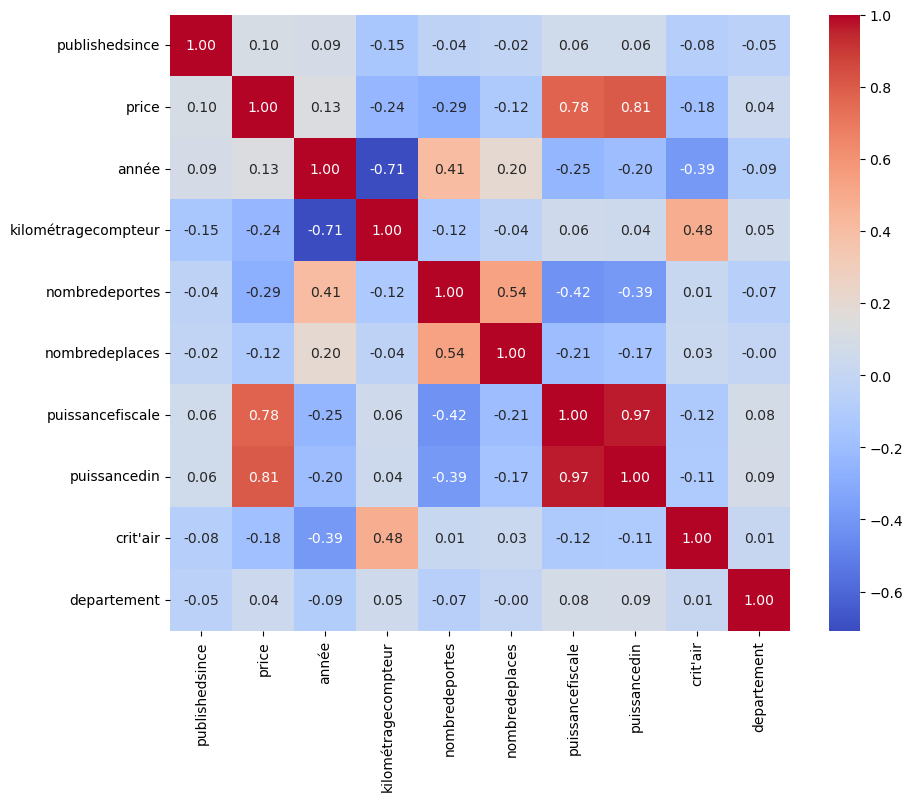

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = voiture_filtre.corr()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()


C:\Users\2000002850\AppData\Local\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\2000002850\AppData\Local\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\Users\2000002850\AppData\Local\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\2000002850\AppData\Local\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric 

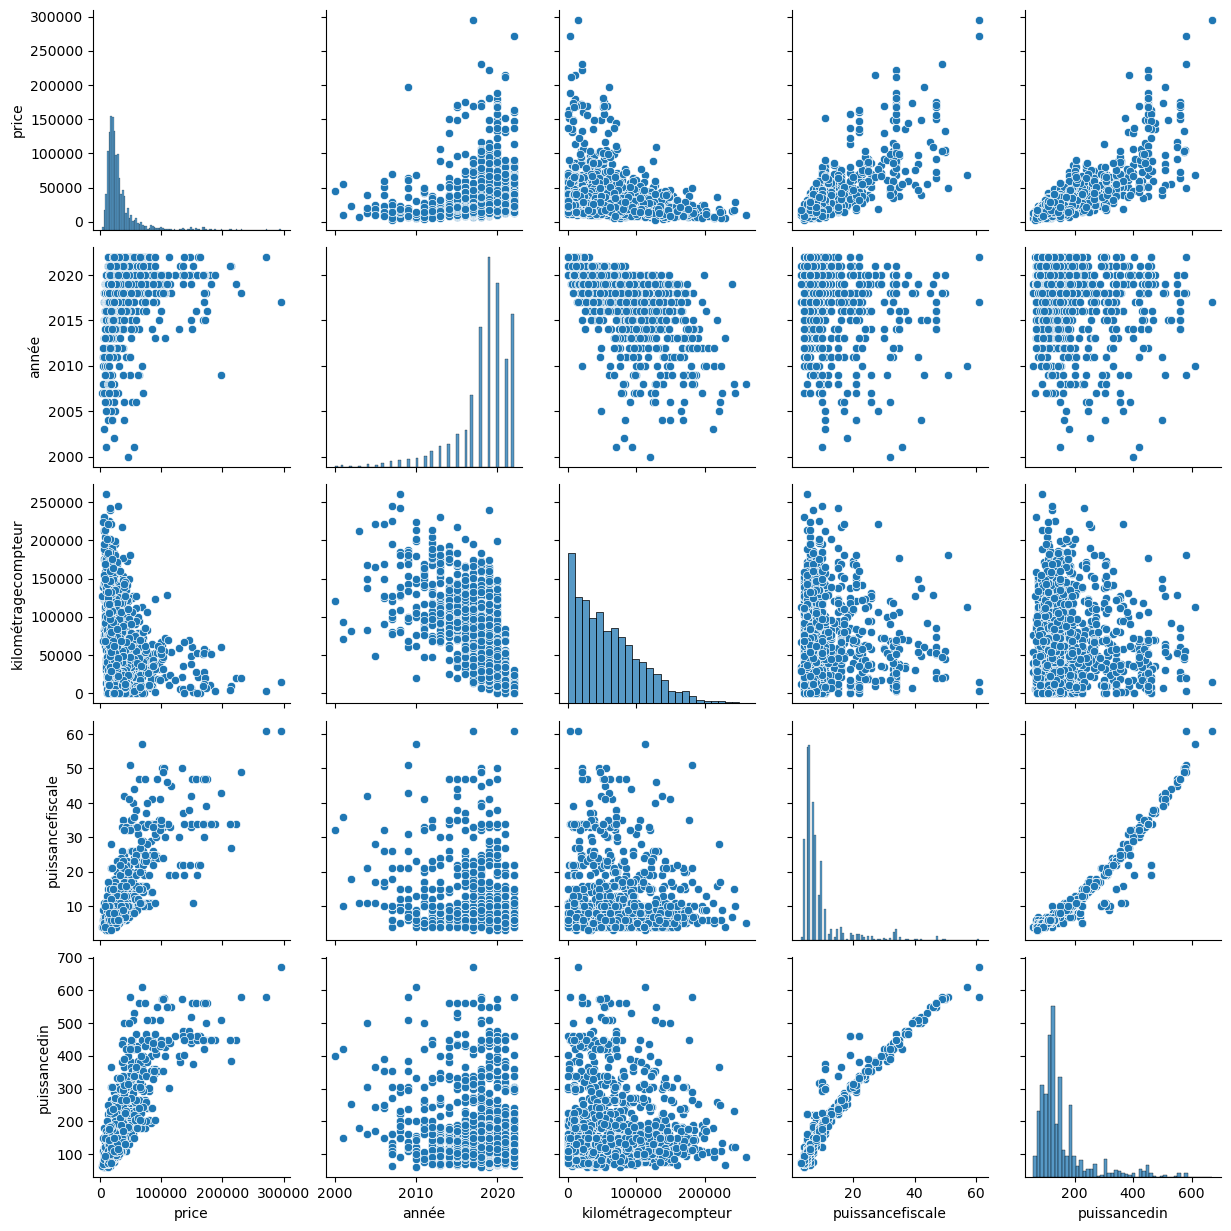

In [62]:
cols = ['price', 'année', 'kilométragecompteur', 'puissancefiscale', 'puissancedin']  
sns.pairplot(voiture_filtre[cols])
plt.show()


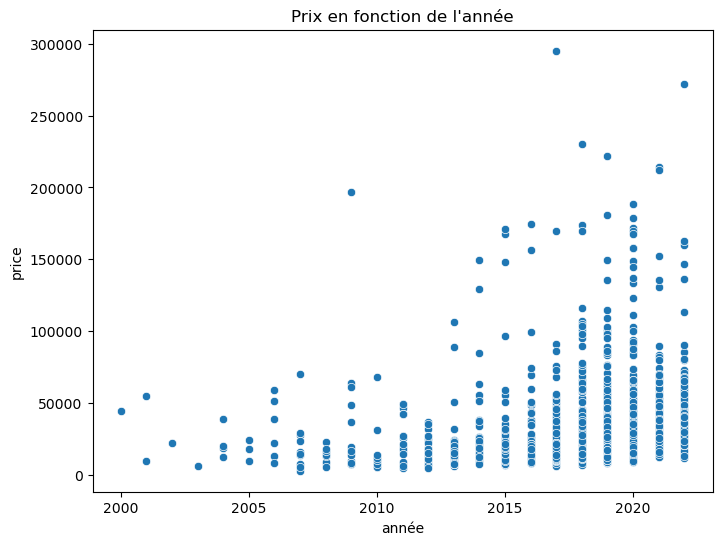

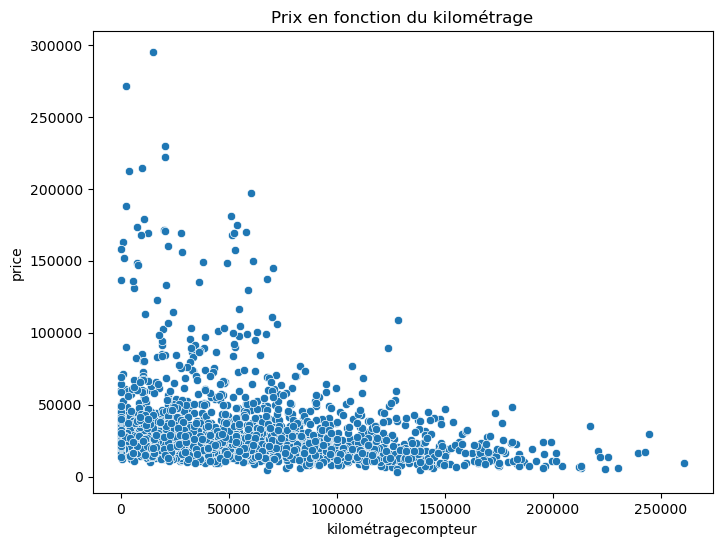

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='année', y='price', data=voiture_filtre)
plt.title('Prix en fonction de l\'année')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilométragecompteur', y='price', data=voiture_filtre)
plt.title('Prix en fonction du kilométrage')
plt.show()


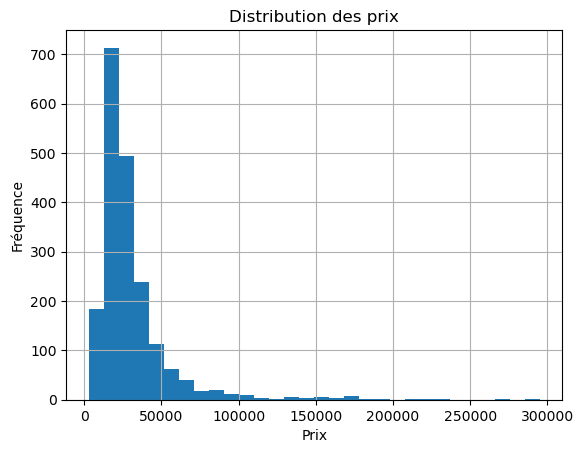

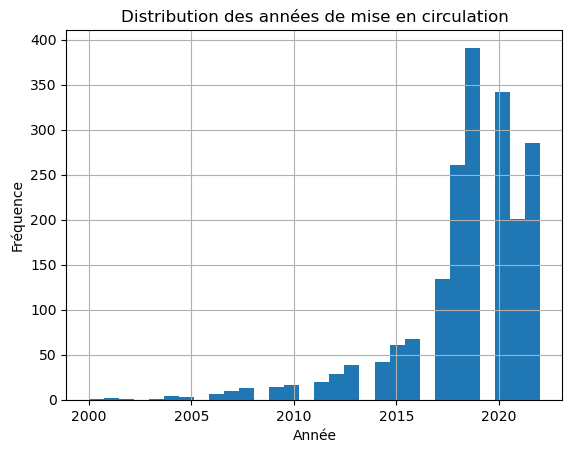

In [64]:
voiture_filtre['price'].hist(bins=30)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

voiture_filtre['année'].hist(bins=30)
plt.title('Distribution des années de mise en circulation')
plt.xlabel('Année')
plt.ylabel('Fréquence')
plt.show()


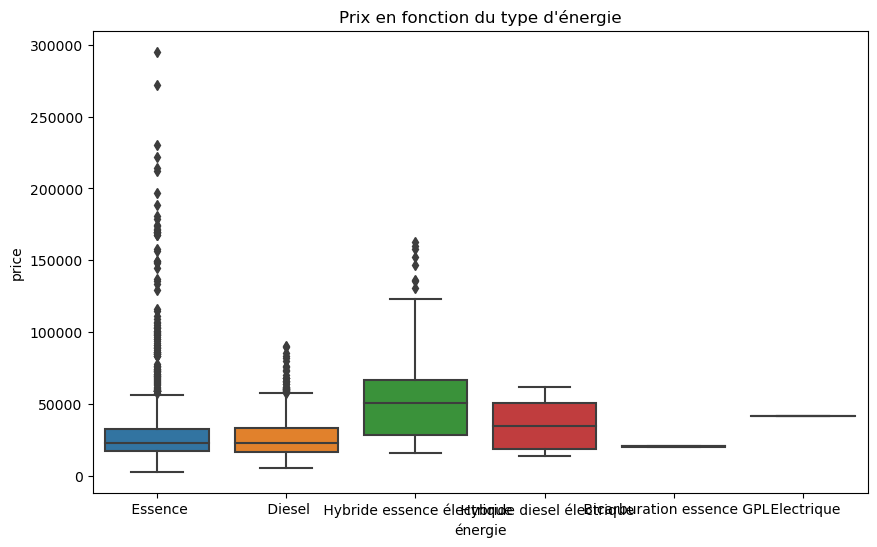

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='énergie', y='price', data=voiture_filtre)
plt.title('Prix en fonction du type d\'énergie')
plt.show()


In [82]:
#ici nous remplacons toutes le valeurs quantitatifs NaN par le mode de le colonne.
mode_values = voiture_filtre.select_dtypes(include=['object']).mode().iloc[0]
voiture_modele = voiture_filtre.fillna(mode_values)



In [83]:
voiture_modele

,publishedsince,carmodel,price,année,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,nombredeportes,...,garantie,premièremain(déclaratif),puissancefiscale,puissancedin,crit'air,émissionsdeco2,normeeuro,departement,vendeur,couleurintérieure
0,2,RENAULT TWINGO 3,11080,2020.0,non requis,27297,Essence,mécanique,gris,5.0,...,12 mois,oui,5,90,1.0,B,EURO6,35,Professionnel,NOIR
1,5,BMW SERIE 4 F36 GRAN COUPE,50690,2019.0,non requis,59778,Diesel,automatique,Saphirschwarz,5.0,...,24 mois,non,15,258,2.0,D,EURO6,31,Professionnel,NOIR
2,19,BMW SERIE 2 F45 ACTIVE TOURER,19740,2017.0,requis,128835,Hybride essence électrique,automatique,gris metal,5.0,...,6 mois,non,5,136,1.0,A,EURO6,94,Professionnel,cuir noir
3,8,RENAULT TRAFIC 2 MINIBUS,13890,2007.0,requis,225334,Diesel,mécanique,GRIS F,4.0,...,6 mois,non,9,135,3.0,E,EURO4,28,Professionnel,GRIS
4,60,CITROEN C3 (3E GENERATION),16780,2020.0,non requis,14218,Essence,mécanique,gris foncé,5.0,...,12 mois,non,5,110,1.0,B,EURO6,61,Professionnel,NOIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,3,TOYOTA YARIS 3,17420,2019.0,non requis,29699,Hybride essence électrique,automatique,blanc,5.0,...,12 mois,oui,3,73,1.0,A,EURO6,35,Professionnel,NOIR
2437,40,PORSCHE 911 TYPE 992,167880,2020.0,non requis,9523,Essence,automatique,rouge verni,2.0,...,12 mois,oui,34,450,1.0,F,EURO6,27,Professionnel,cuir noir
2438,60,CITROEN C3 (3E GENERATION),23350,2022.0,non requis,1,Essence,mécanique,Blanc,5.0,...,12 mois,oui,6,110,1.0,C,EURO6,13,Professionnel,NOIR
2439,14,AUDI A3 (3E GENERATION) SPORTBACK,21930,2017.0,requis,61363,Diesel,automatique,gris,5.0,...,12 mois,non,8,150,2.0,B,EURO6,94,Professionnel,NOIR


In [90]:
#Ici nous encodons nos variables 
variables_cat = ['contrôletechnique', 'énergie', 'boîtedevitesse', 'couleurextérieure', 'garantie', 'premièremain(déclaratif)', 'émissionsdeco2', 'normeeuro', 'vendeur', 'couleurintérieure', 'carmodel']
voiture_dum = voiture_modele.copy()

#fonction pour chaque colonne
for col in variables_cat:
    voiture_dum[col], _ = pd.factorize(voiture_dum[col])


In [91]:
print(voiture_dum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 0 to 2440
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   publishedsince            1944 non-null   Int64  
 1   carmodel                  1944 non-null   int64  
 2   price                     1944 non-null   Int64  
 3   année                     1944 non-null   float64
 4   contrôletechnique         1944 non-null   int64  
 5   kilométragecompteur       1944 non-null   Int64  
 6   énergie                   1944 non-null   int64  
 7   boîtedevitesse            1944 non-null   int64  
 8   couleurextérieure         1944 non-null   int64  
 9   nombredeportes            1944 non-null   float64
 10  nombredeplaces            1927 non-null   float64
 11  garantie                  1944 non-null   int64  
 12  premièremain(déclaratif)  1944 non-null   int64  
 13  puissancefiscale          1944 non-null   int32  
 14  puissanc

In [92]:
voiture_dum = voiture_dum.dropna()

In [106]:
voiture_dum

,publishedsince,carmodel,price,année,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,nombredeportes,...,garantie,premièremain(déclaratif),puissancefiscale,puissancedin,crit'air,émissionsdeco2,normeeuro,departement,vendeur,couleurintérieure
0,2,0,11080,2020.0,0,27297,0,0,0,5.0,...,0,0,5,90,1.0,0,0,35,0,0
1,5,1,50690,2019.0,0,59778,1,1,1,5.0,...,1,1,15,258,2.0,1,0,31,0,0
2,19,2,19740,2017.0,1,128835,2,1,2,5.0,...,2,1,5,136,1.0,2,0,94,0,1
3,8,3,13890,2007.0,1,225334,1,0,3,4.0,...,2,1,9,135,3.0,3,1,28,0,2
4,60,4,16780,2020.0,0,14218,0,0,4,5.0,...,0,1,5,110,1.0,0,0,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,3,436,17420,2019.0,0,29699,2,1,7,5.0,...,0,0,3,73,1.0,2,0,35,0,0
2437,40,97,167880,2020.0,0,9523,0,1,114,2.0,...,0,0,34,450,1.0,5,0,27,0,1
2438,60,4,23350,2022.0,0,1,0,0,45,5.0,...,0,0,6,110,1.0,4,0,13,0,0
2439,14,127,21930,2017.0,1,61363,1,1,0,5.0,...,0,1,8,150,2.0,0,0,94,0,0


In [107]:
voiture_dum.to_csv('voiture.csv', index=False)

# Modèle de regression

## Regréssion Linéaire

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = voiture_dum.drop(columns=['price'])  # Variables indépendantes
y = voiture_dum['price']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print("RMSE:", rmse)
print("R^2:", r2)



RMSE: 13427.469877328242
R^2: 0.7563383620254736


## Regréssion Ridge

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# les variables indépendantes (X) et la variable dépendante (y)
X = voiture_dum.drop(columns=['price'])  # Variables indépendantes
y = voiture_dum['price']  # Variable dépendante (celle que vous souhaitez prédire)

# Divise les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crée le modèle de régression Ridge
alpha = 1.0  # Paramètre de régularisation, ajustez-le au besoin
ridge_model = Ridge(alpha=alpha)

# Entraîne le modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)

# Prédis les valeurs sur l'ensemble de test
y_pred = ridge_model.predict(X_test)

# Évalue la performance du modèle en utilisant RMSE et R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Affiche les résultats
print("RMSE:", rmse)
print("R^2:", r2)


RMSE: 13425.417039305901
R^2: 0.756412859997705


## Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor


# Sépare les variables indépendantes (X) et la variable dépendante (y)
X = voiture_dum.drop(columns=['price'])  # Variables indépendantes
y = voiture_dum['price']  # Variable dépendante (celle que vous souhaitez prédire)

# Divise les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crée le modèle de régression Random Forest
n_estimators = 100  # Nombre d'arbres dans la forêt, ajustez-le au besoin
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Entraîne le modèle sur l'ensemble d'entraînement
random_forest_model.fit(X_train, y_train)

# Prédis les valeurs sur l'ensemble de test
y_pred = random_forest_model.predict(X_test)

# Évalue la performance du modèle en utilisant RMSE et R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Affiche les résultats
print("RMSE:", rmse)
print("R^2:", r2)


RMSE: 9640.486436551942
R^2: 0.8743979633147002


## Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingRegressor


# Sépare les variables indépendantes (X) et la variable dépendante (y)
X = voiture_dum.drop(columns=['price'])  # Variables indépendantes
y = voiture_dum['price']  # Variable dépendante (celle que vous souhaitez prédire)

# Divise les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crée le modèle de régression Gradient Boosting
n_estimators = 100  # Nombre d'estimateurs (arbres), ajustez-le au besoin
learning_rate = 0.1  # Taux d'apprentissage, ajustez-le au besoin
gradient_boosting_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Entraîne le modèle sur l'ensemble d'entraînement
gradient_boosting_model.fit(X_train, y_train)

# Prédis les valeurs sur l'ensemble de test
y_pred = gradient_boosting_model.predict(X_test)

# Évalue la performance du modèle en utilisant RMSE et R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Affiche les résultats
print("RMSE:", rmse)
print("R^2:", r2)


RMSE: 9534.31792078116
R^2: 0.8771491842862593
